In [33]:
from plots_11 import *

In [26]:
df = pd.read_csv('data/Resultados_Saber_11_nonull.csv')


In [29]:
plot_graphs_saber_once(period=20194, department1='BOLIVAR', department2='ANTIOQUIA', department3='ATLANTICO')

{'period': 20194, 'department1': 'BOLIVAR', 'department2': 'ANTIOQUIA', 'department3': 'ATLANTICO'}


KeyboardInterrupt: 

In [38]:


def to_zip(zip_path: str, folder_to_zip: str = '') -> None:
    """ Función para convertir las imágenes de extensión '.png' y archivos '.json' de cierta carpeta
    a un archivo '.zip'. El archivo zip resultante será almacenado en con la dirección de `zip_path` """
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        for file in os.listdir(folder_to_zip):
            if os.path.splitext(file)[1] in ['.png', '.json']:
                zipf.write(os.path.join(folder_to_zip, file), os.path.basename(file))

def plot_circular_diagram(sub_df: pd.DataFrame, y_label: str, path: str,
                          title: str = '', figsize: tuple = (12, 12),
                          autopct: str = '%1.1f%%', startangle: int = 130,
                          pctdistance: float = 0.8, colors: list = None) -> None:
    """ Graficar los diagramas circulares con anillos y colores pasteles naturales """
    counts = sub_df[y_label].value_counts()
    fig, ax = plt.subplots(figsize=figsize)
    if colors is None:
        colors = sns.color_palette("pastel")
    ax.pie(counts, labels=counts.index, autopct=autopct, startangle=startangle,
           pctdistance=pctdistance, colors=colors, wedgeprops=dict(width=0.3))
    ax.set_title(title, fontweight='bold')
    plt.savefig(path, transparent=True)

def plot_histogram(sub_df: pd.DataFrame, x: str, path: str, title: str = '', x_label: str = '',
                   y_label: str = '', figsize: tuple = (12, 12), hue: str | None = None) -> None:
    """ Graficar un histograma. Se utiliza solo para comparar las puntuaciones de determinada competencia """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel(y_label, fontweight='bold')
    sns.histplot(sub_df, x=x, stat='count', kde=True, hue=hue, ax=ax, palette="pastel")
    plt.savefig(path, transparent=True)

def plot_socioeconomic_variables(sub_df: pd.DataFrame) -> None:
    """ Graficar variables socioeconómicas """
    colors = sns.color_palette("pastel")
    plot_circular_diagram(sub_df, 'FAMI_ESTRATOVIVIENDA', 'static/imgs/saber_11/estrato.png', title='ESTRATO VIVIENDA', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_TIENEAUTOMOVIL', 'static/imgs/saber_11/automovil.png', title='TIENE AUTOMOVIL', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_TIENELAVADORA', 'static/imgs/saber_11/lavadora.png', title='TIENE LAVADORA', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_TIENECOMPUTADOR', 'static/imgs/saber_11/computador.png', title='TIENE COMPUTADORA', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_TIENEINTERNET', 'static/imgs/saber_11/internet.png', title='TIENE INTERNET', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_EDUCACIONMADRE', 'static/imgs/saber_11/educacion_madre.png', title='NIVEL EDUCATIVO MADRE', colors=colors)
    plot_circular_diagram(sub_df, 'FAMI_EDUCACIONPADRE', 'static/imgs/saber_11/educacion_padre.png', title='NIVEL EDUCATIVO PADRE', colors=colors)
    plot_circular_diagram(sub_df, 'ESTU_GENERO', 'static/imgs/saber_11/estudiante_genero.png', title='GENERO ESTUDIANTE', colors=colors)

def plot_puntuations_variables(sub_df: pd.DataFrame, hue: str | None = None) -> None:
    """ Graficar variables de puntuaciones """
    plot_histogram(sub_df, x='PUNT_INGLES', path='static/imgs/saber_11/puntaje_ingles.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='INGLES', hue=hue)
    plot_histogram(sub_df, x='PUNT_MATEMATICAS', path='static/imgs/saber_11/puntaje_matematicas.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='MATEMATICAS', hue=hue)
    plot_histogram(sub_df, x='PUNT_SOCIALES_CIUDADANAS', path='static/imgs/saber_11/puntaje_sociales_ciud.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='SOCIALES Y CIUDADANA', hue=hue)
    plot_histogram(sub_df, x='PUNT_C_NATURALES', path='static/imgs/saber_11/puntaje_ciencias_nat.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='CIENCIAS NATURALES', hue=hue)
    plot_histogram(sub_df, x='PUNT_LECTURA_CRITICA', path='static/imgs/saber_11/puntaje_lectura_cri.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='LECTURA CRITICA', hue=hue)
    plot_histogram(sub_df, x='PUNT_GLOBAL', path='static/imgs/saber_11/puntaje_global.png',
                    x_label='PUNTAJE', y_label='CANTIDAD', title='PUNTAJE GLOBAL', hue=hue)

def plot_graphs_saber_once(**kwargs) -> None:
    """
    Graficar todas las variables socioeconómicas y las puntuaciones con ayuda de las funciones
    anteriormente creadas. Si a la función no se le especifican departamento, entonces lo que se quiere comparar
    son los resultados de todo el país; si una función no tiene municipios seleccionado, entonces lo que se
    quiere comparar son los departamentos; si una función no tiene instituciones seleccionadas, entonces lo que
    se quiere comparar las universidad en dichos municipios; si están todos las opciones especificadas, entonces
    lo que se quiere es comparar instituciones que se encuentran dentro del municipio y, por tanto, el mismo
    departamento

    kwargs = {
        'period': int,
        'department': str | None,
        'municipality': str | None,
        'institution': str | None,
        ...
    }
    """
    label_dept, label_municipality, label_institution = 'COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'COLE_NOMBRE_ESTABLECIMIENTO'
    kwargs = dict(kwargs)
    keys = kwargs.keys()
    print(kwargs)

    period = kwargs['period']
    sub_df = df[df['PERIODO'] == period]
    if not any('department' in param and kwargs[param] is not None for param in keys):
        # No tiene departamento -> Analizar país
        plot_puntuations_variables(sub_df)
        plot_socioeconomic_variables(sub_df)

        to_zip('static/imgs/saber_11/imgs.zip', 'static/imgs/saber_11')
        return
    
    depts = [kwargs[param] for param in kwargs if 'department' in param and kwargs[param] is not None]
    sub_df = sub_df[sub_df[label_dept].isin(depts)]
    if not any('municipality' in param and kwargs[param] is not None for param in keys):
        # Tiene departamento -> No municipio
        plot_puntuations_variables(sub_df, hue=label_dept if len(depts) > 1 else None)
        plot_socioeconomic_variables(sub_df)

        to_zip('static/imgs/saber_11/imgs.zip', 'static/imgs/saber_11')
        return

    munis = [kwargs[param] for param in kwargs if 'municipality' in param and kwargs[param] is not None]
    sub_df = sub_df[sub_df[label_municipality].isin(munis)]
    if not any('institution' in param and kwargs[param] is not None for param in keys):
        # Tiene Municipio -> No institución
        plot_puntuations_variables(sub_df, hue=label_municipality if len(munis) > 1 else None)
        plot_socioeconomic_variables(sub_df)

        to_zip('static/imgs/saber_11/imgs.zip', 'static/imgs/saber_11')
        return

    # Tiene Institución
    insts = [kwargs[param] for param in kwargs if 'institution' in param and kwargs[param] is not None]
    sub_df = sub_df[sub_df[label_institution].isin(insts)]
    plot_puntuations_variables(sub_df, hue=label_institution if len(insts) > 1 else None)
    plot_socioeconomic_variables(sub_df)
    
    to_zip('static/imgs/saber_11/imgs.zip', 'static/imgs/saber_11')



{'period': 20194, 'department1': 'BOLIVAR', 'department2': 'ANTIOQUIA', 'department3': 'ATLANTICO'}


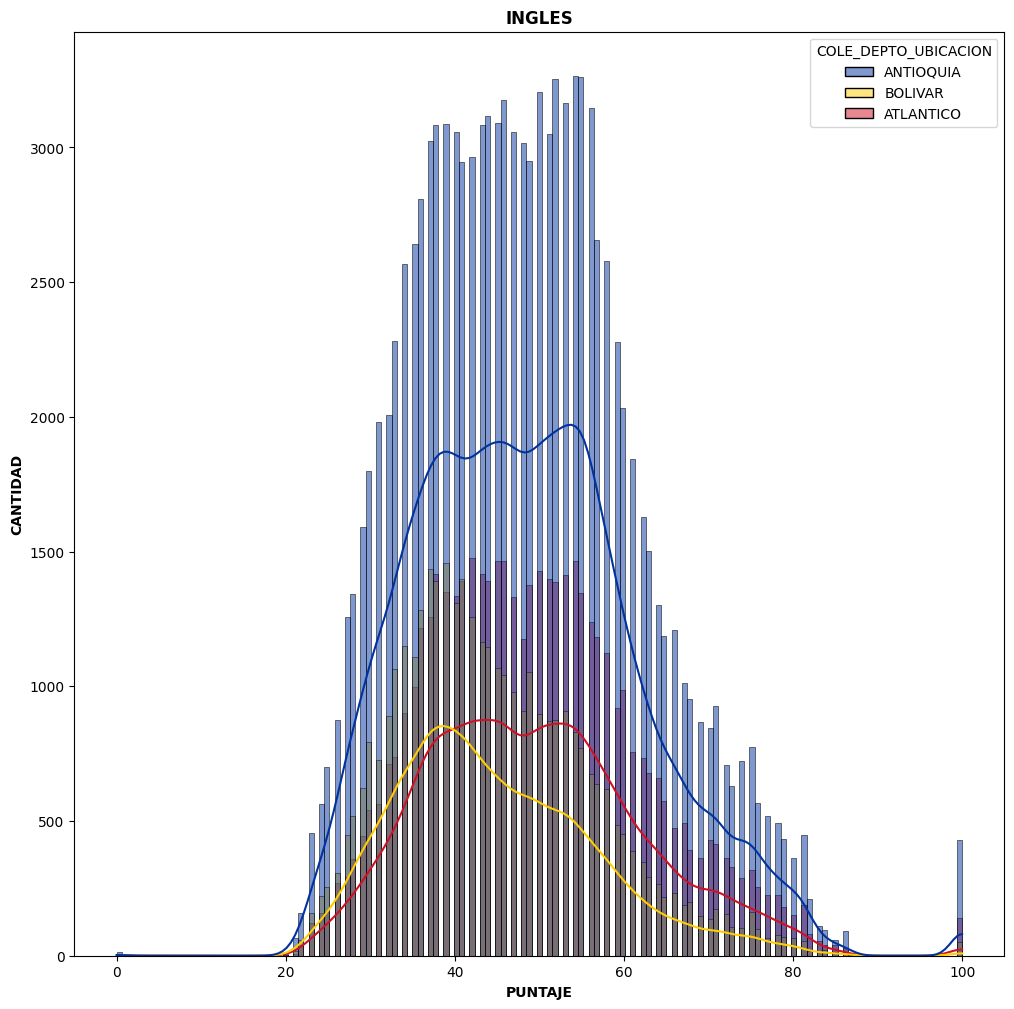

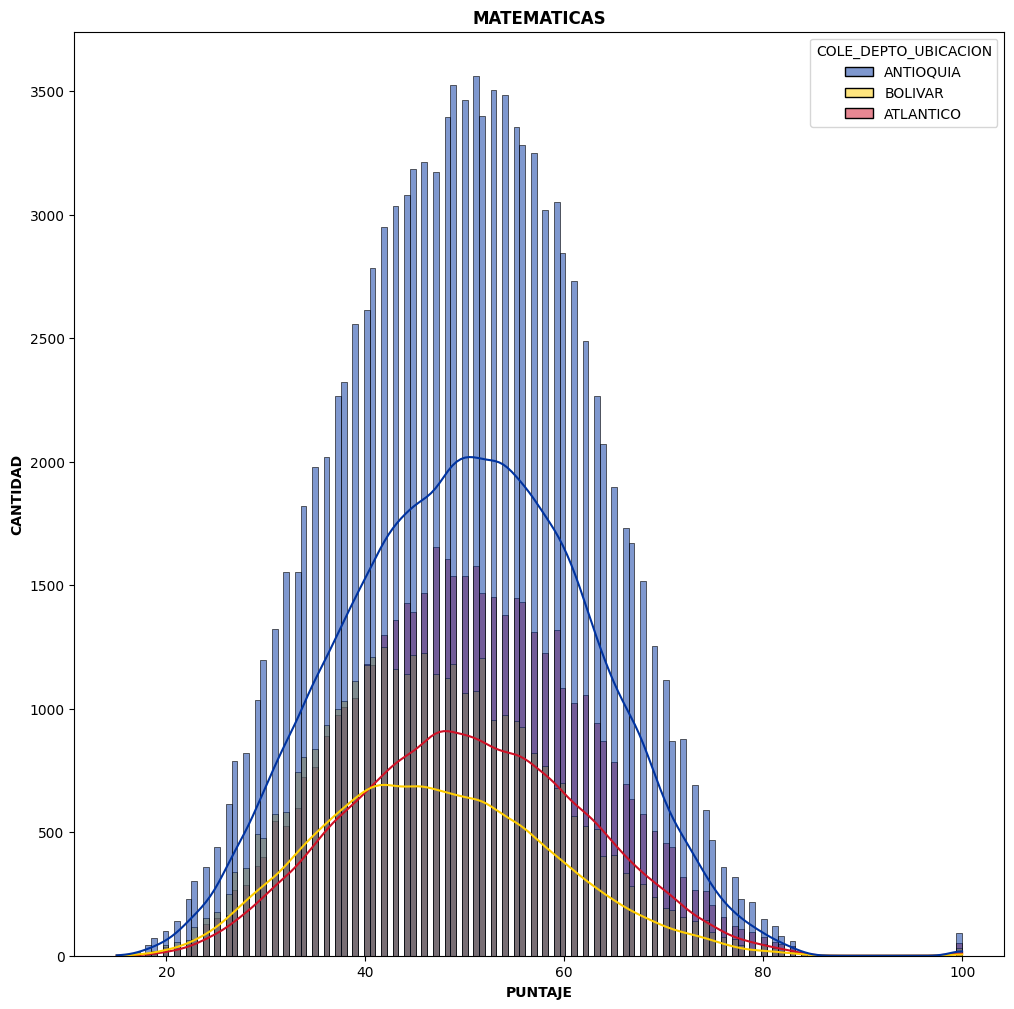

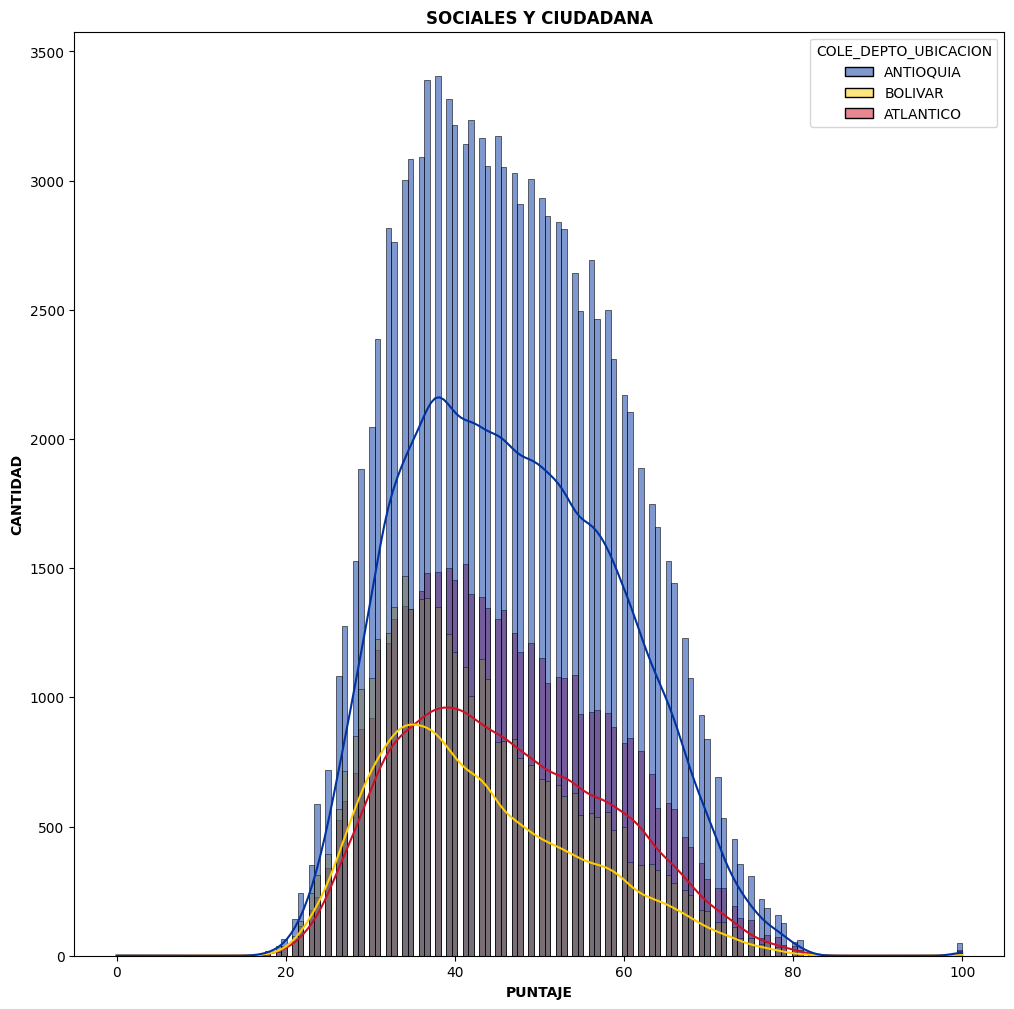

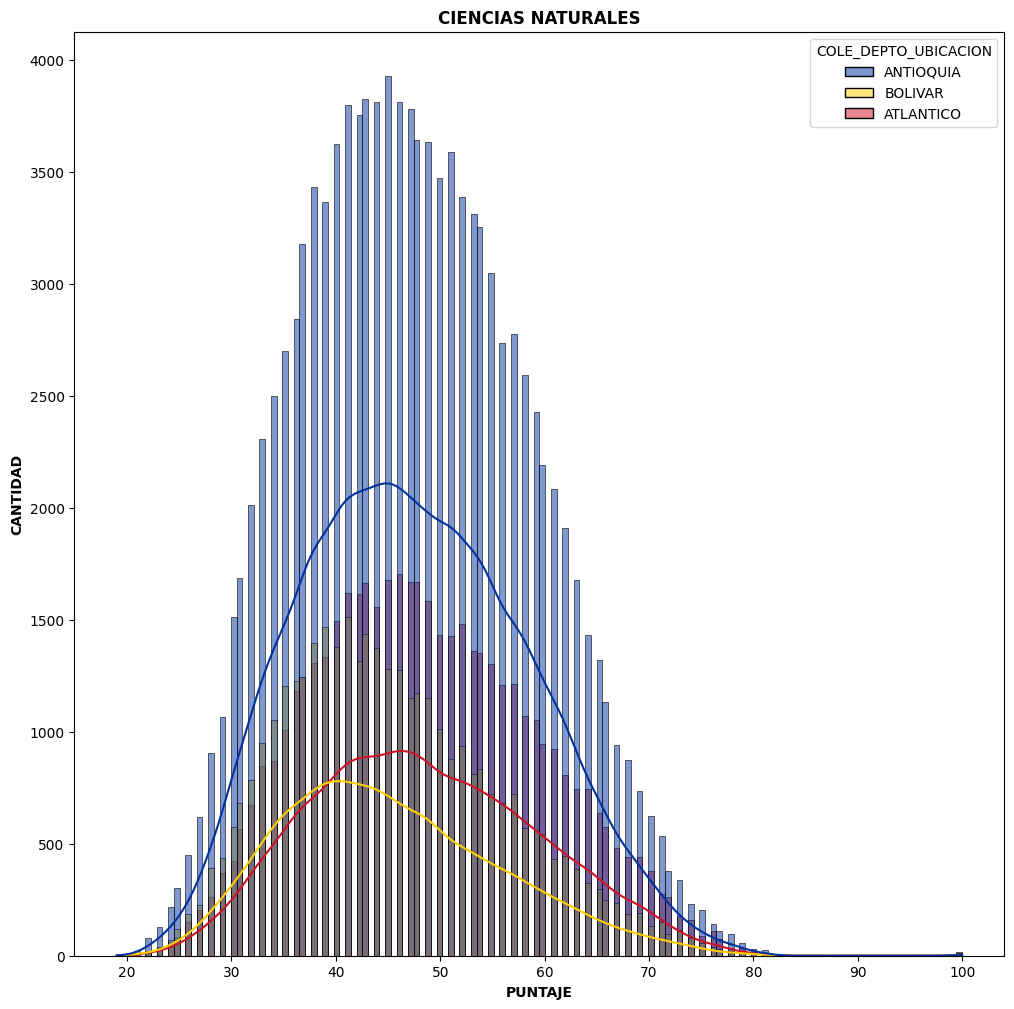

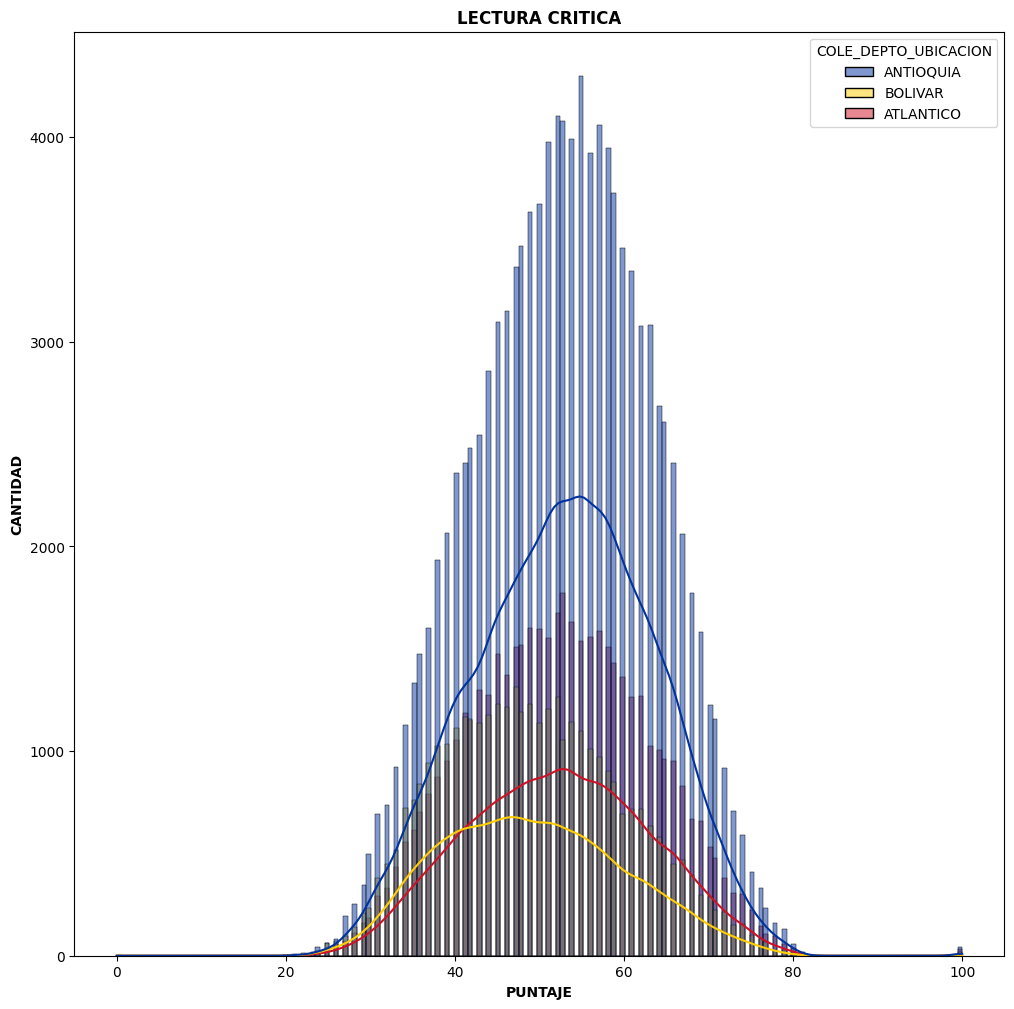

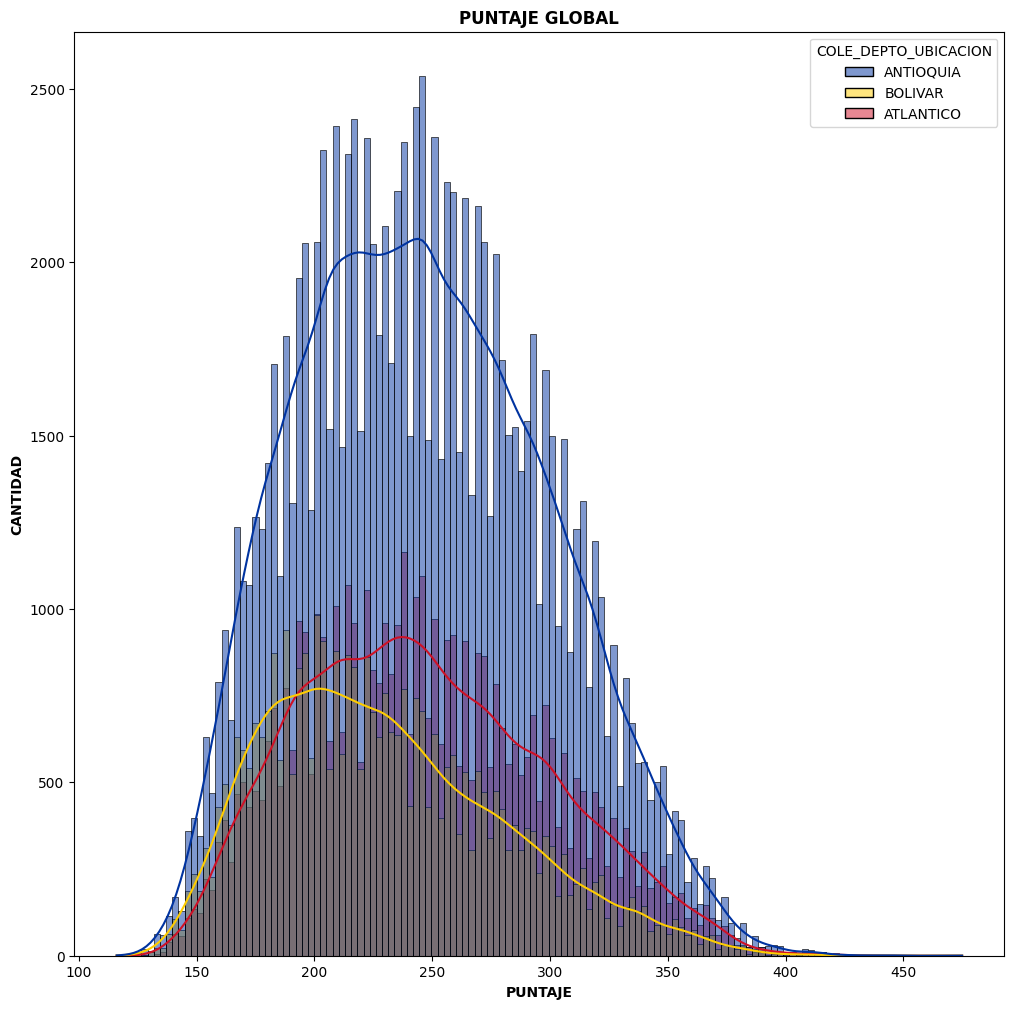

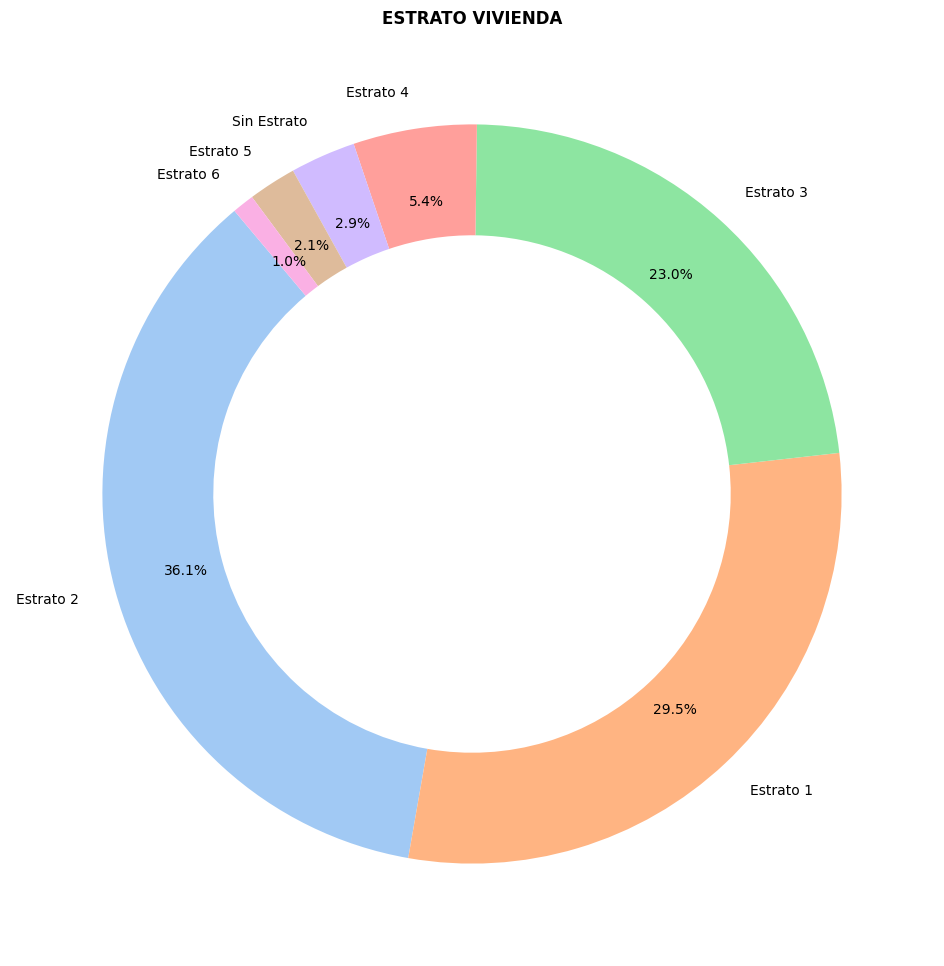

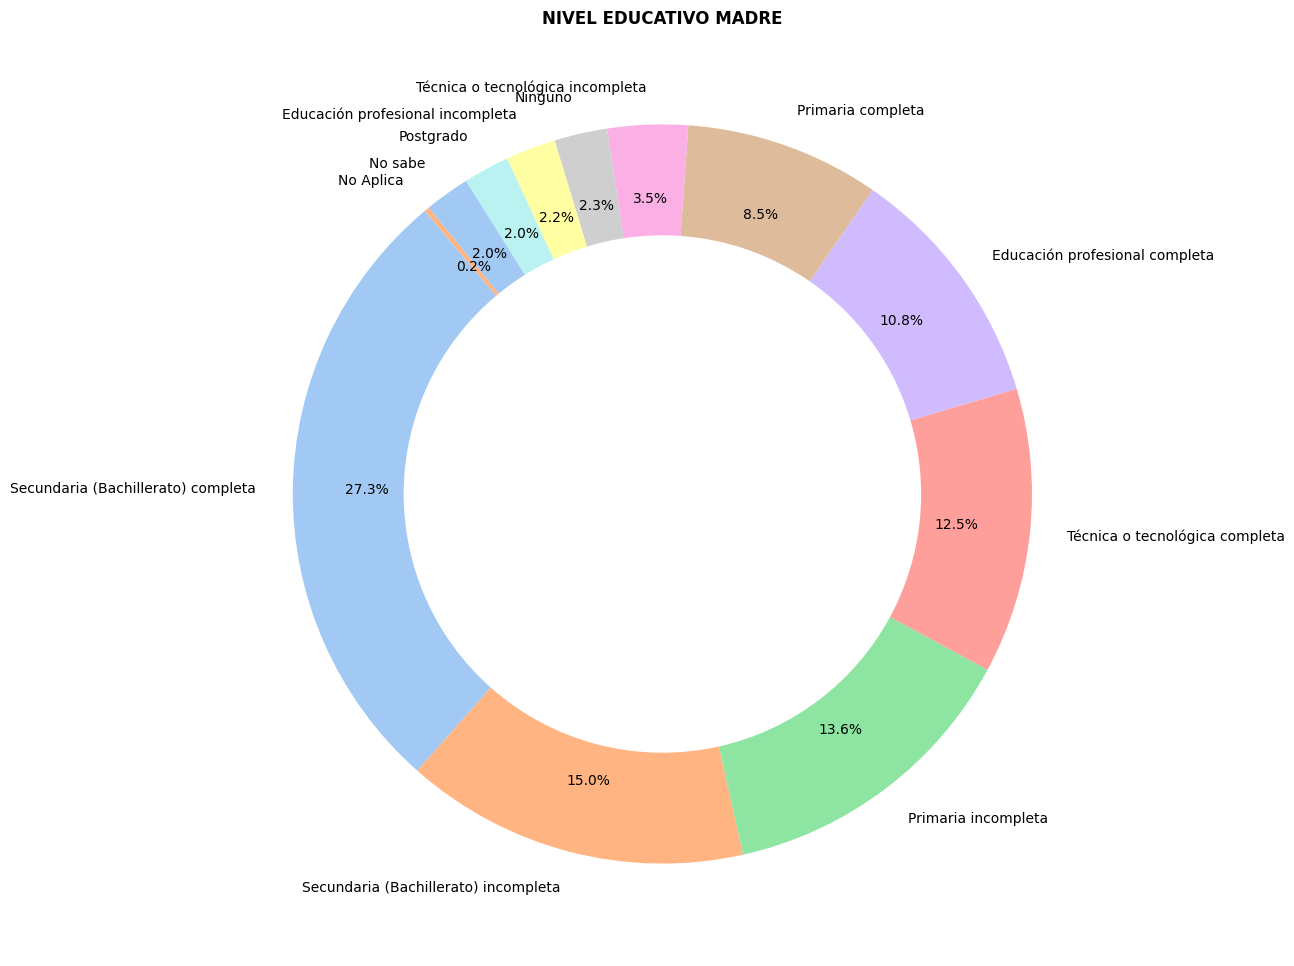

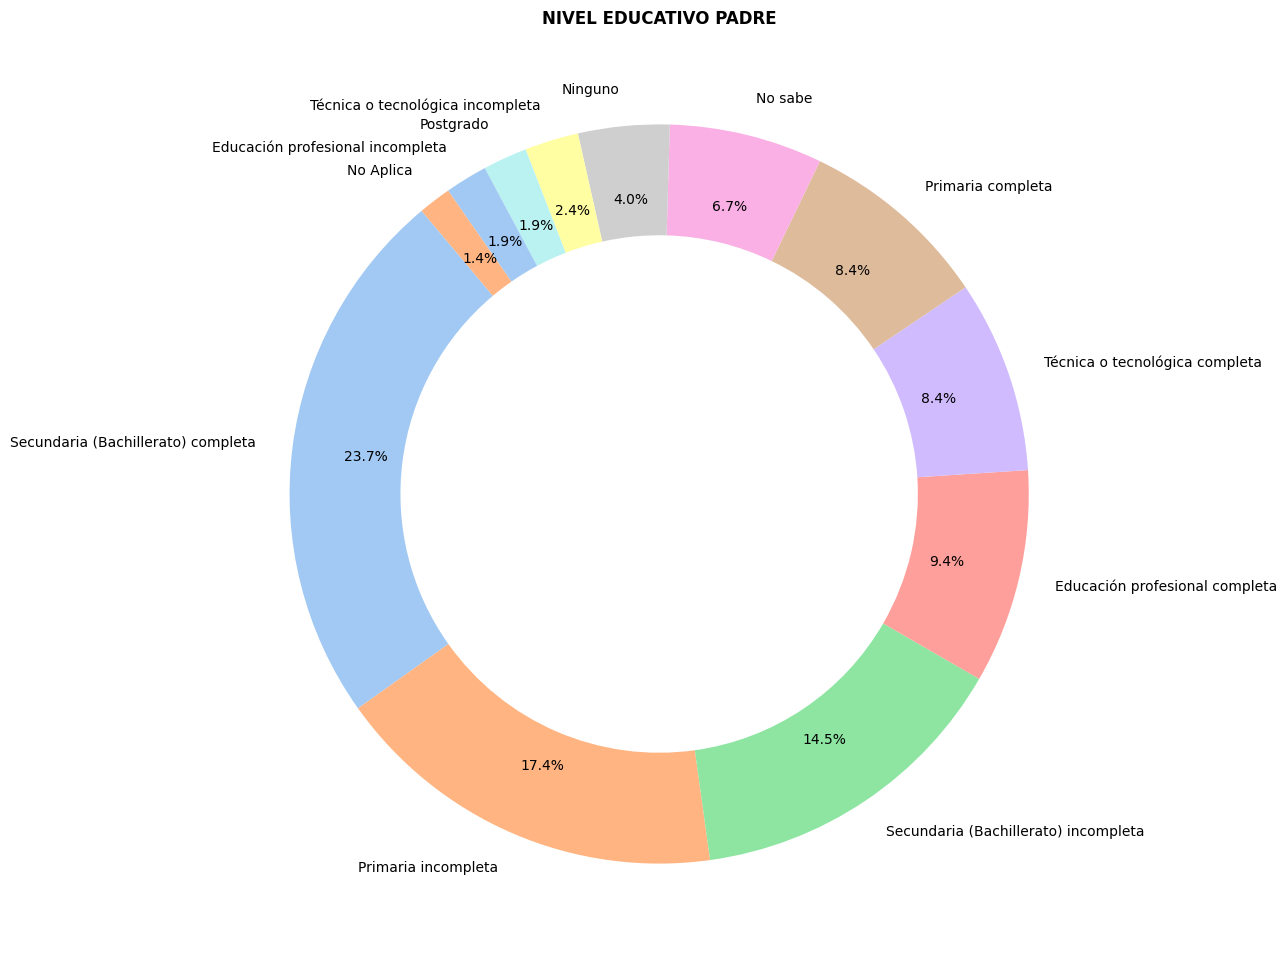

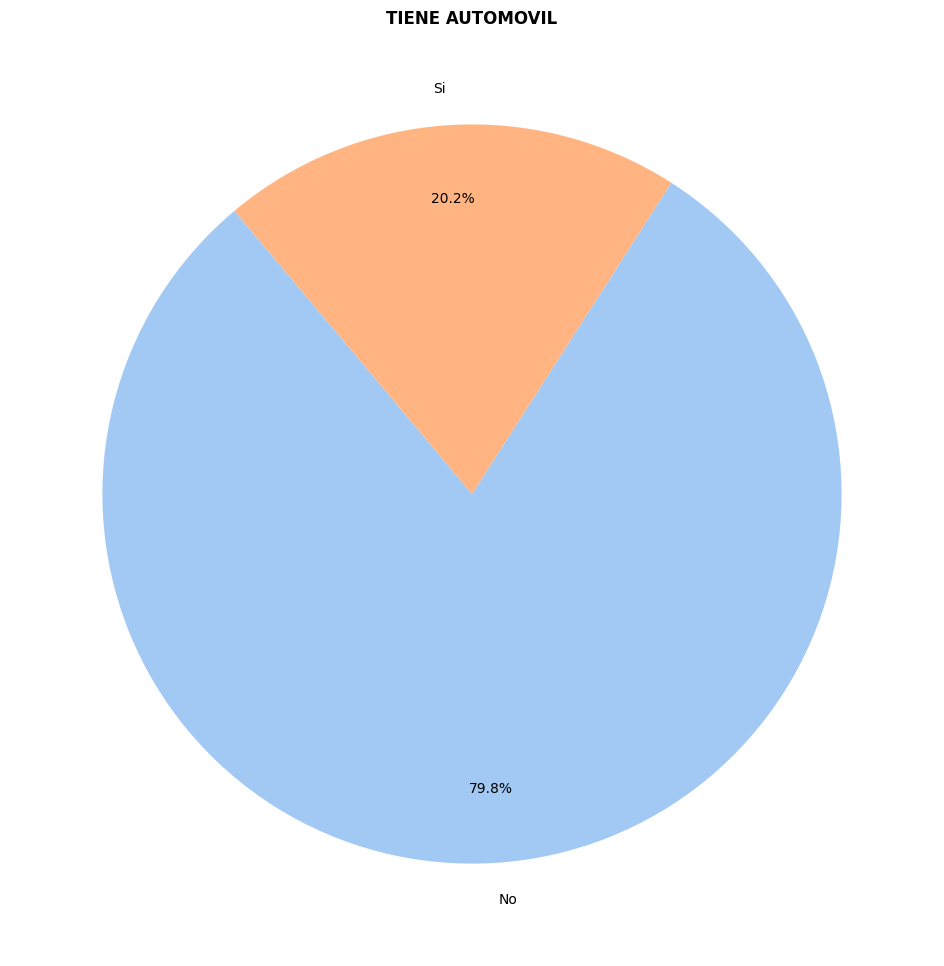

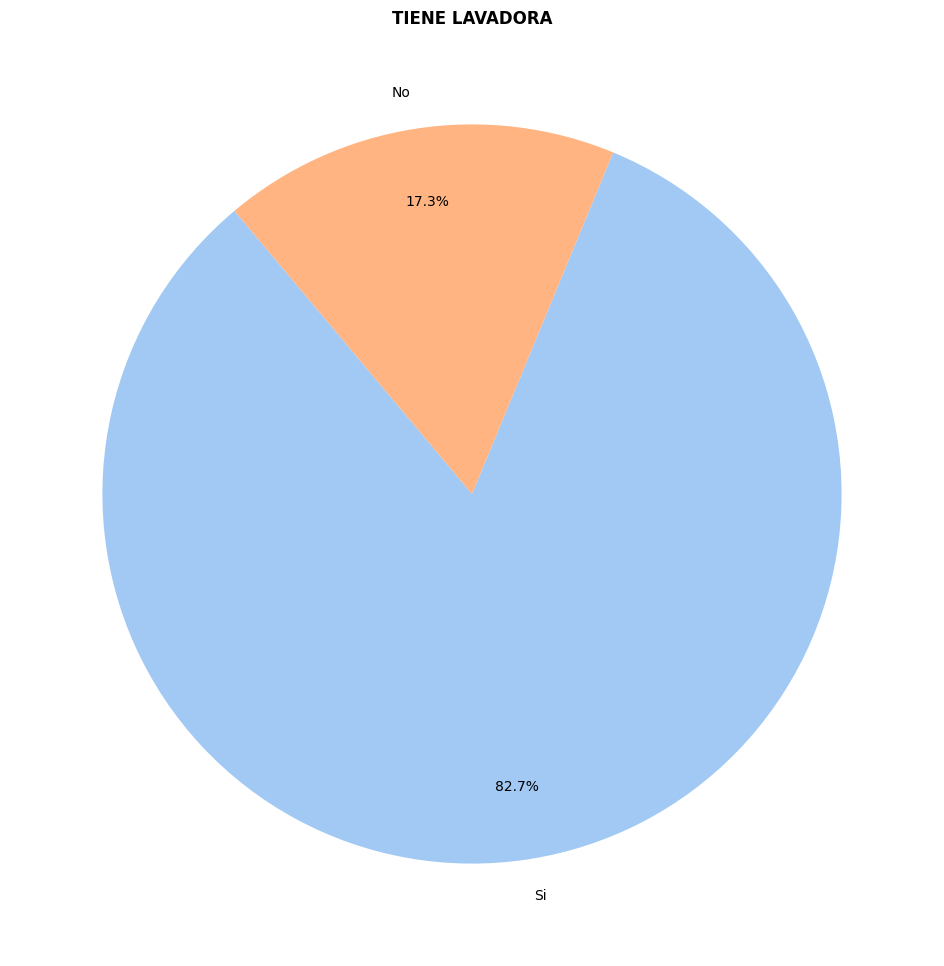

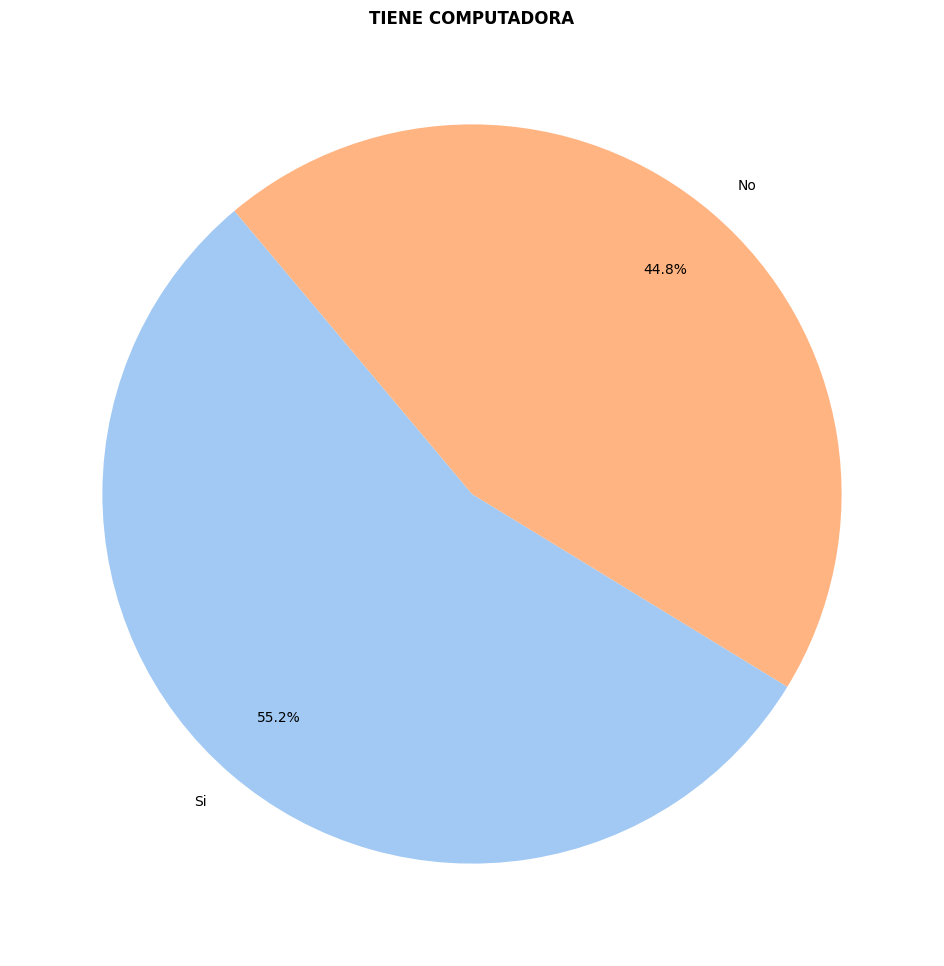

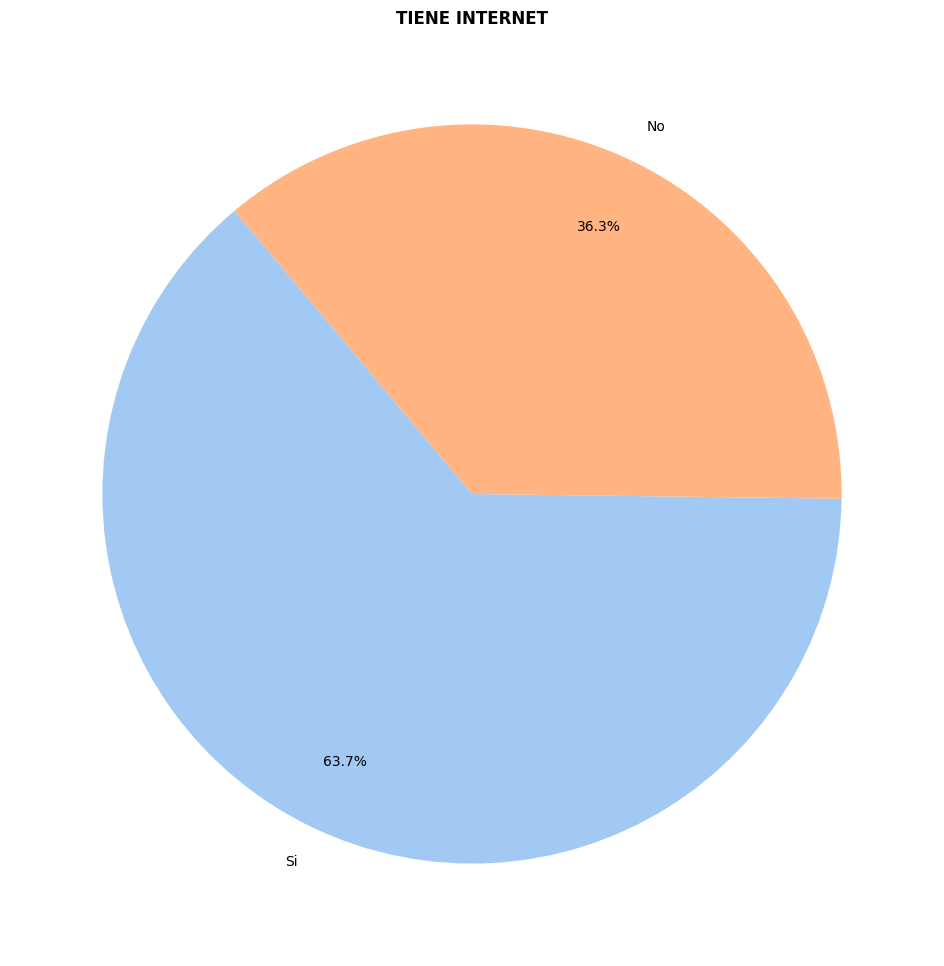

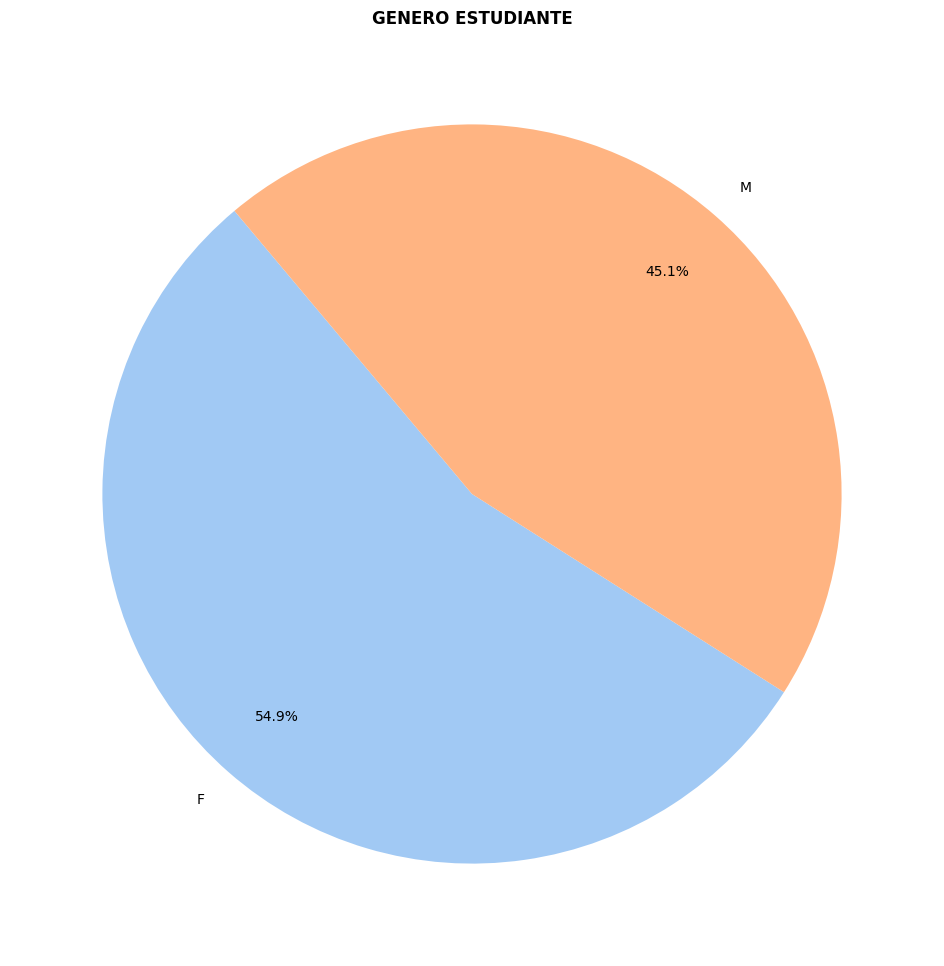

In [21]:
plot_graphs_saber_once(period=20194, department1='BOLIVAR', department2='ANTIOQUIA', department3='ATLANTICO')